In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_excel('C:\\Users\\ADMIN\\Downloads\\1673873196_hr_comma_sep (1).xlsx')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df = df.rename(columns = {'satisfaction_level':'satisfaction',
                        'last_evalution':'evalution','number_project':'Project_count',
                       'average_monthly_hours':'averageMonthlyHours','time_spend_company':'yearAtCompany',
                       'Work_accident':'WorkAccident','promotion_last_5years':'promotion','sales':'department',
                       'left':'turnover'})

In [5]:
df.shape

(14999, 10)

In [6]:
df.head()

,satisfaction,last_evaluation,Project_count,average_montly_hours,yearAtCompany,WorkAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.turnover.value_counts((1),2)

0    0.761917
1    0.238083
Name: turnover, dtype: float64

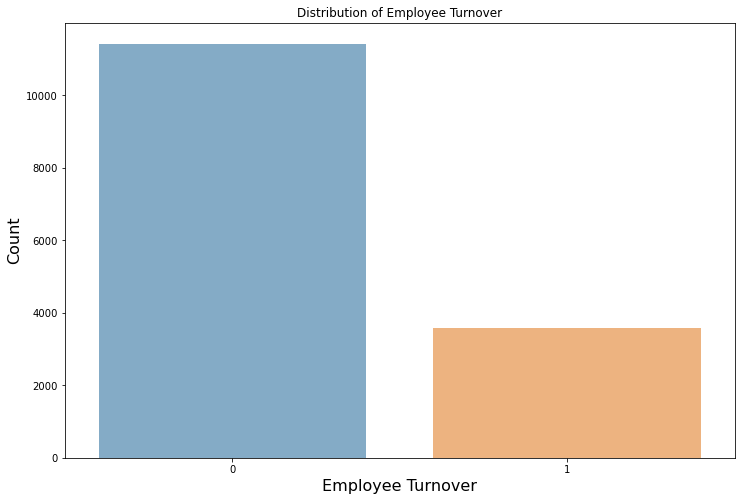

In [8]:
plt.figure(figsize=(12,8))
turnover = df.turnover.value_counts()
sns.barplot(y=turnover.values,x=turnover.index,alpha = 0.6)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover',fontsize = 16)
plt.ylabel('Count',fontsize = 16);

In [9]:
df.isnull().any()

satisfaction            False
last_evaluation         False
Project_count           False
average_montly_hours    False
yearAtCompany           False
WorkAccident            False
turnover                False
promotion               False
department              False
salary                  False
dtype: bool

In [10]:
df.dtypes

satisfaction            float64
last_evaluation         float64
Project_count             int64
average_montly_hours      int64
yearAtCompany             int64
WorkAccident              int64
turnover                  int64
promotion                 int64
department               object
salary                   object
dtype: object

### Understand what factors contributed most to employee turnover by EDA

In [11]:
# Display the statistical overveiw of the employees
round (df.describe(),2)

,satisfaction,last_evaluation,Project_count,average_montly_hours,yearAtCompany,WorkAccident,turnover,promotion
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [12]:
# display the mean summary of Employees(Turnover V.S. Non-turnover).
# What do you notice between the groups?
turnover_Summary = df.groupby('turnover')
round(turnover_Summary.mean(),2)

,satisfaction,last_evaluation,Project_count,average_montly_hours,yearAtCompany,WorkAccident,promotion
turnover,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


In [13]:
round(turnover_Summary.std(),2)

,satisfaction,last_evaluation,Project_count,average_montly_hours,yearAtCompany,WorkAccident,promotion
turnover,,,,,,,
0,0.22,0.16,0.98,45.68,1.56,0.38,0.16
1,0.26,0.20,1.82,61.20,0.98,0.21,0.07


### Correlation Matrix

In [14]:
##create a correlation matrix.What features correlate the most with turnover ?
##what other correlation did you find?

In [15]:
corr = df.corr()
corr

,satisfaction,last_evaluation,Project_count,average_montly_hours,yearAtCompany,WorkAccident,turnover,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
Project_count,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
WorkAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


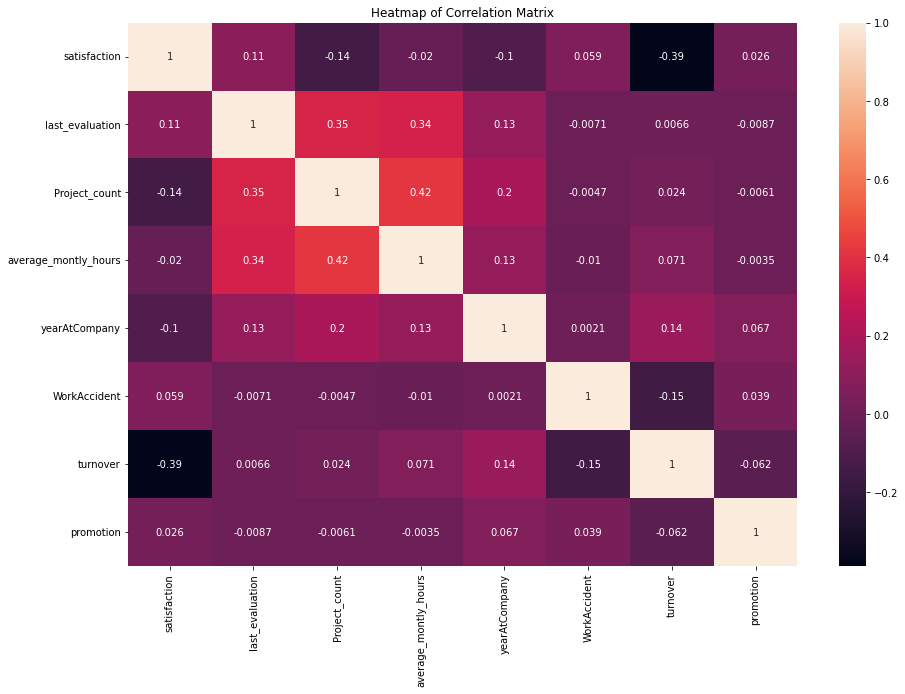

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(corr,xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,annot=True)
plt.title('Heatmap of Correlation Matrix');

In [17]:
## Distribution of Satisfaction,Evalution and Monthly Hours
# plot the distribution of Employee Satisfaction,Evalution and Project Count.What story can you tell?

Text(0, 0.5, 'Employee Count')

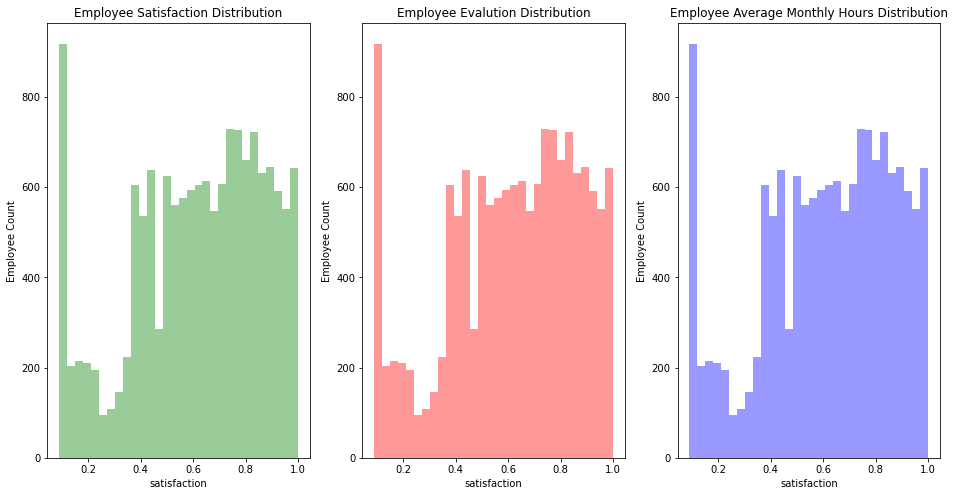

In [18]:
# Set up the matplotlib figure
f,axes = plt.subplots(ncols=3,figsize=(16,8))
#Graph Employee Satisfaction
sns.distplot(df.satisfaction,kde=False,color = 'g',
ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count');


#Graph Employee Evalution
sns.distplot(df.satisfaction,kde=False,color = 'r',
ax=axes[1]).set_title('Employee Evalution Distribution')
axes[1].set_ylabel('Employee Count');

#Graph Employee Average Monthly Hours Distribution
sns.distplot(df.satisfaction,kde=False,color = 'b',
ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

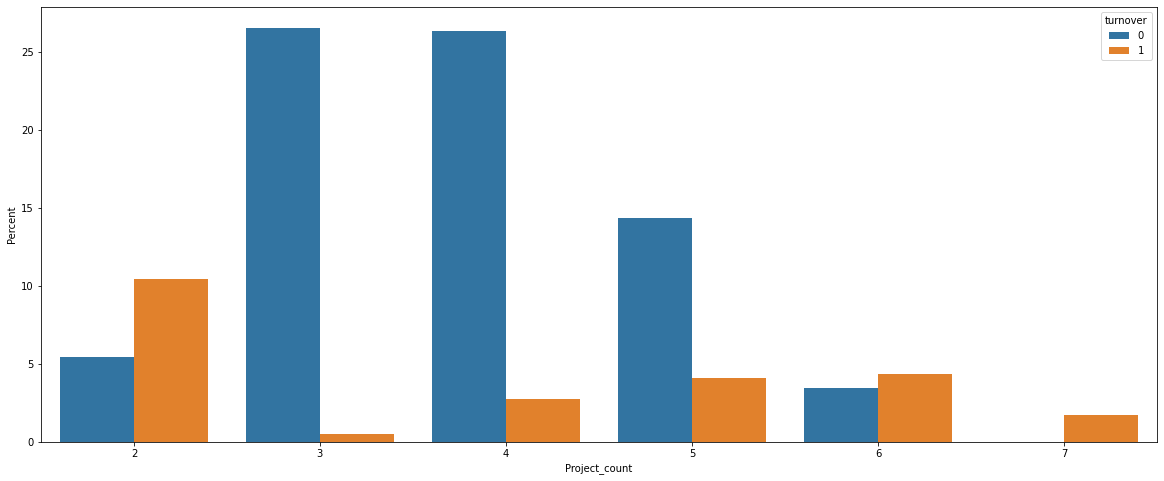

In [19]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="Project_count", y="Project_count", hue="turnover", 
data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent");

In [20]:
# import KMeans Model
from sklearn.cluster import KMeans

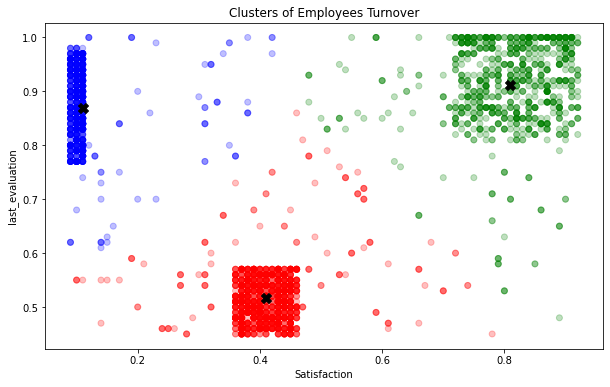

In [21]:
#Graph and create 3 clusters of Employees Turnover
kmeans = KMeans(n_clusters=3 ,random_state =2)
kmeans.fit(df[df.turnover==1][["satisfaction","last_evaluation"]])
kmeans_colors = ['green' if c== 0 else 'blue' if c == 2 else 'red'
for c in kmeans.labels_]
fig = plt.figure(figsize=(10,6))
plt.scatter(x= "satisfaction",y="last_evaluation",data=df[df.turnover==1],
            alpha=0.25,color=kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("last_evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker = "X",s=100)
plt.title("Clusters of Employees Turnover")

plt.show();

## Pre-Processing


In [22]:
## Handle the left Class Imbalance using SMOTE technique

In [23]:
cat_var = ['department','salary','turnover','promotion']
num_var = ['satisfaction','last_evaluation','Project_count','average_montly_hours','yearAtCompany','WorkAccident']
categorical_df = pd.get_dummies(df[cat_var],drop_first = True ,dummy_na = True)
numerical_df = df[num_var]

new_df = pd.concat([categorical_df,numerical_df],axis=1)
new_df.head()

,turnover,promotion,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,...,department_nan,salary_low,salary_medium,salary_nan,satisfaction,last_evaluation,Project_count,average_montly_hours,yearAtCompany,WorkAccident
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0.38,0.53,2,157,3,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0.80,0.86,5,262,6,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0.11,0.88,7,272,4,0
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0.72,0.87,5,223,5,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0.37,0.52,2,159,3,0


In [24]:
new_df.shape

(14999, 21)

### Train/Test Splitb



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,confusion_matrix,precision_recall_curve

In [26]:
# Create X and Y set
X = new_df.iloc[:,1:]
y= new_df.iloc[:,0]


In [27]:
# define train and test
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.20,random_state = 123 , stratify=y)
print(X_train.shape)
print(X_test.shape)

(11999, 20)
(3000, 20)


In [28]:
# Class Imbalance
round(df.turnover.value_counts(1),2)

0    0.76
1    0.24
Name: turnover, dtype: float64

In [33]:
#Upsample the train data using SMOTE technique
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [34]:
sm=SMOTE(random_state=12,sampling_strategy=1.0)
x_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [36]:
print("Original shape:",X_train.shape,y_train.shape)
print("SMOTE sample shape:",x_train_sm.shape,y_train_sm.shape)

Original shape: (11999, 20) (11999,)
SMOTE sample shape: (18284, 20) (18284,)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

### Fold Cross validation model training and evalution performance

In [40]:
#we are training 3 models
#1 Logistic Regression cLassifier
#2 random Forest Classifier
#3Gradient Boosting Classifier


In [42]:
# Logistic Regression Classifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [45]:
lr = LogisticRegression()
lr = lr.fit(x_train_sm,y_train_sm)
lr

LogisticRegression()

In [46]:
# Apply 5-Fold Cross Validation on Logistic Regression
lr_result = cross_val_score(lr,x_train_sm,y_train_sm,cv=5,scoring='f1')
lr_result.mean()

0.7901557545286988

In [47]:
# Logistic regression Classifier AUR(0.77)
print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test,lr.predict(X_test))
print("logistic regression AUC = %2.2f" %lr_auc)
lr2 = lr.fit(x_train_sm,y_train_sm)
print(classification_report(y_test,lr.predict(X_test)))



 ---Logistic Regression Model---
logistic regression AUC = 0.77
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2286
           1       0.50      0.78      0.61       714

    accuracy                           0.76      3000
   macro avg       0.71      0.77      0.72      3000
weighted avg       0.82      0.76      0.78      3000



In [53]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
# Random Forest ClaSsifier()
rf = RandomForestClassifier()
rf = rf.fit(x_train_sm,y_train_sm)
rf

RandomForestClassifier()

In [56]:
# Apply 5fold cross validation on random Forest
rf_result = cross_val_score(rf,x_train_sm,y_train_sm,cv=5,scoring='f1')
rf_result.mean()


0.9803191614559962

In [57]:
# Random Forest Classifier AUR (0.98)
from sklearn.metrics import roc_auc_score

In [60]:
print("\n\n ----- Random Forest Model----")
rf_roc_auc = roc_auc_score(y_test,rf.predict(X_test))
print("Random Forest AUC = %2.2f"%rf_roc_auc)
print(classification_report(y_test,rf.predict(X_test)))



 ----- Random Forest Model----
Random Forest AUC = 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [61]:
# Gradient Bossting Classifier
from sklearn.ensemble import GradientBoostingClassifier


In [62]:
gbc = GradientBoostingClassifier()
gbc = gbc.fit(x_train_sm,y_train_sm)
gbc

GradientBoostingClassifier()

In [64]:
from sklearn.metrics import roc_auc_score


In [65]:
print ("\n\n ---- Gradient Boosting Model -----")
gbc_auc = roc_auc_score(y_test,gbc.predict(X_test))
print("Gradient Boosting Classifier AUC = %2.2f"%gbc_auc)
print(classification_report(y_test,gbc.predict(X_test)))



 ---- Gradient Boosting Model -----
Gradient Boosting Classifier AUC = 0.96
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.91      0.94      0.92       714

    accuracy                           0.96      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000



### Model Evalution (F1 Score & ROC/AUC)

In [66]:
# Roc Graph

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [74]:
fpr,tpr,thresholds = roc_curve(y_test,lr.predict_proba(X_test)[:,1])
rf_fpr,rf_tpr,rf_thresholds = roc_curve(y_test,rf.predict_proba(X_test)[:,1])
gbc_fpr,gbc_tpr,gbc_thresholds = roc_curve(y_test,gbc.predict_proba(X_test)[:,1])

In [75]:
plt.figure(figsize=(15,12))

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

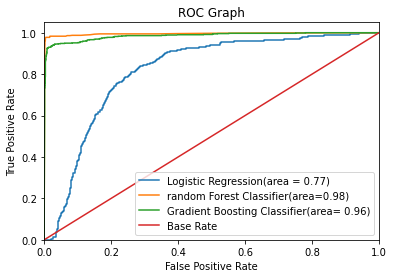

In [79]:
# Plot Logistic Regression ROC
plt.plot(fpr,tpr,label = 'Logistic Regression(area = %0.2f)'%lr_auc)

# Plot  Random Forest ROC
plt.plot(rf_fpr,rf_tpr,label='random Forest Classifier(area=%0.2f)'%rf_roc_auc)
# plot Decision Tree ROc
plt.plot(gbc_fpr,gbc_tpr,label = 'Gradient Boosting Classifier(area= %0.2f)'%gbc_auc)

#plot BaseRate ROC
plt.plot([0,1],[0,1],label='Base Rate')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show();